In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import glob
from  more_itertools import unique_everseen
from scipy.stats import pearsonr, spearmanr
from sklearn import linear_model
from sklearn.metrics import r2_score
from adjustText import adjust_text
from functools import partial
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
pd.set_option('chained_assignment',None)
from matplotlib.backends.backend_pdf import PdfPages

In [72]:
order = ['study_id', 'sample_id', 'participant_id', 'sample_type', 'country', 'lat', 'long', 'age_yrs', 'timepoint_days',
         'febrile', 'survey', 'infection_category', 'PCR_pos', 'microscopy_pos', 'p_spp', 'pf', 'pv', 'pm', 'pk', 'po',
         'coinfection', 'HRP2_deletion', 'quansys_HRP2_pg_ml', 'quansys_LDH_Pan_pg_ml', 'quansys_LDH_Pv_pg_ml',
         'quansys_LDH_Pf_pg_ml', 'quansys_CRP_ng_ml', 'quansys_HRP2_result', 'quansys_LDH_Pan_result',
         'quansys_LDH_Pv_result', 'quansys_LDH_Pf_result', 'quansys_CRP_result', 'quansys_type']

In [73]:
all_files = glob.glob('C:/Users/lzoeckler/Desktop/FOR_ML/binned/*.csv')
big_df = []
for file in all_files:
    df = pd.read_csv(file)
    big_df.append(df)
big_df = pd.concat(big_df, sort=True)
big_df = big_df[order]
big_df.head()

,study_id,sample_id,participant_id,sample_type,country,lat,long,age_yrs,timepoint_days,febrile,...,quansys_LDH_Pan_pg_ml,quansys_LDH_Pv_pg_ml,quansys_LDH_Pf_pg_ml,quansys_CRP_ng_ml,quansys_HRP2_result,quansys_LDH_Pan_result,quansys_LDH_Pv_result,quansys_LDH_Pf_result,quansys_CRP_result,quansys_type
0,2.0,AEC874868A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,0.0,NaN,...,14.41,2.33,NaN,NaN,0,0,0,NaN,NaN,4plex
1,2.0,AEC878025A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,13.0,NaN,...,14.41,2.33,NaN,NaN,0,0,0,NaN,NaN,4plex
2,2.0,AEC878047A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,14.0,NaN,...,14.41,2.33,NaN,NaN,0,0,0,NaN,NaN,4plex
3,2.0,AEC878069A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,15.0,NaN,...,14.41,2.33,NaN,NaN,0,0,0,NaN,NaN,4plex
4,2.0,AEC878091A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,16.0,NaN,...,14.41,2.33,NaN,NaN,0,0,0,NaN,NaN,4plex


In [74]:
def clean_strings(val):
    if isinstance(val, str):
        clean = val.replace('<', '')
        clean = clean.replace('>', '')
        try:
            return(float(clean))
        except ValueError:
            return(np.nan)
    elif isinstance(val, float) or isinstance(val, int):
        return(float(val))
    else:
        return(np.nan)

In [75]:
val_cols = ['quansys_HRP2_pg_ml', 'quansys_LDH_Pan_pg_ml', 'quansys_LDH_Pv_pg_ml',
            'quansys_LDH_Pf_pg_ml', 'quansys_CRP_ng_ml']

In [76]:
test_df = big_df.copy(deep=True)
test_df[val_cols] = test_df[val_cols].applymap(clean_strings)
test_df[val_cols] = test_df[val_cols].applymap(np.log10)
test_df.head()

,study_id,sample_id,participant_id,sample_type,country,lat,long,age_yrs,timepoint_days,febrile,...,quansys_LDH_Pan_pg_ml,quansys_LDH_Pv_pg_ml,quansys_LDH_Pf_pg_ml,quansys_CRP_ng_ml,quansys_HRP2_result,quansys_LDH_Pan_result,quansys_LDH_Pv_result,quansys_LDH_Pf_result,quansys_CRP_result,quansys_type
0,2.0,AEC874868A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,0.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
1,2.0,AEC878025A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,13.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
2,2.0,AEC878047A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,14.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
3,2.0,AEC878069A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,15.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
4,2.0,AEC878091A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,16.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex


In [77]:
analyte_name_dict = {'HRP2_pg_ml': ('HRP2', 'pg/ml'), 'LDH_Pan_pg_ml': ('LDH_Pan', 'pg/ml'),
                     'LDH_Pv_pg_ml': ('LDH_Pv', 'pg/ml'), 'CRP_ng_ml': ('CRP', 'ng/ml')}

In [87]:
graph_df = test_df.copy(deep=True)
# graph_df = graph_df.loc[graph_df['PCR_pos'] == 1]
graph_df.head()

,study_id,sample_id,participant_id,sample_type,country,lat,long,age_yrs,timepoint_days,febrile,...,quansys_LDH_Pan_pg_ml,quansys_LDH_Pv_pg_ml,quansys_LDH_Pf_pg_ml,quansys_CRP_ng_ml,quansys_HRP2_result,quansys_LDH_Pan_result,quansys_LDH_Pv_result,quansys_LDH_Pf_result,quansys_CRP_result,quansys_type
0,2.0,AEC874868A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,0.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
1,2.0,AEC878025A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,13.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
2,2.0,AEC878047A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,14.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
3,2.0,AEC878069A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,15.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex
4,2.0,AEC878091A,CVAC-PYR-003C,WB,NaN,NaN,NaN,NaN,16.0,NaN,...,1.158664,0.367356,NaN,NaN,0,0,0,NaN,NaN,4plex


In [88]:
graph_df['infection_category'].unique()

array(['uninfected', 'nascent', 'clearing', nan, 'unifected',
       'symptomatic'], dtype=object)

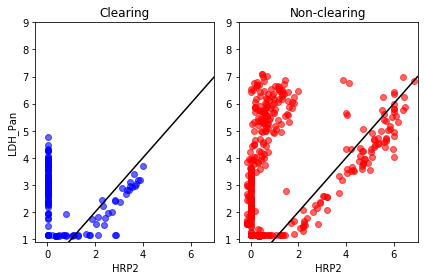

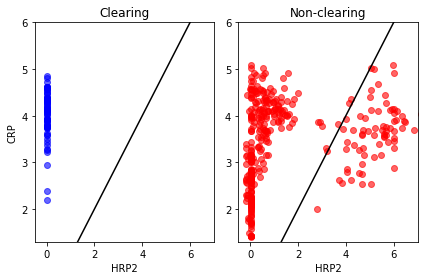

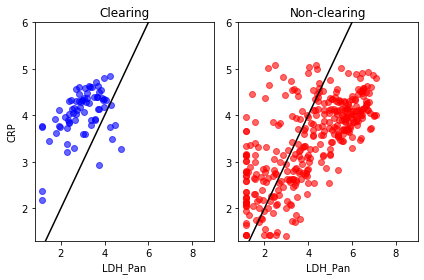

In [92]:
ratios = PdfPages('C:/Users/lzoeckler/Desktop/all_data_graphs/clearing_vs_non.pdf')
pairs = [('quansys_HRP2_pg_ml', 'quansys_LDH_Pan_pg_ml'), ('quansys_HRP2_pg_ml', 'quansys_CRP_ng_ml'), ('quansys_LDH_Pan_pg_ml', 'quansys_CRP_ng_ml')]
x = np.linspace(0, 10, 10000)
for pair in pairs:
    name1 = analyte_name_dict[pair[0].strip('quansys_')][0]
    name2 = analyte_name_dict[pair[1].strip('quansys_')][0]
    if pair == pairs[0]:
        ylim = (.9, 9)
    else:
        ylim = (1.3, 6)
    if pair == pairs[2]:
        xlim = (0.8, 9)
    else:
        xlim = (-.5, 7)
    f = plt.figure()
    f.add_subplot()
    # good info
    title = 'Clearing'
    non_retreated = graph_df.loc[graph_df['infection_category'] == 'clearing']
    plt.subplot(1,2,1)
    plt.scatter(non_retreated[pair[0]], non_retreated[pair[1]], color='blue', alpha=0.6)
    plt.plot(x, x, color='black')
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.tight_layout()
    # bad info
    title = 'Non-clearing'
    retreated = graph_df.loc[graph_df['infection_category'].isin(['uninfected', 'symptomatic', 'nascent',
                                                                  'unifected'])]
    plt.subplot(1,2,2)
    plt.scatter(retreated[pair[0]], retreated[pair[1]], color='red', alpha=0.6)
    plt.plot(x, x, color='black')
    plt.title(title)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(name1)
    plt.tight_layout()
    ratios.savefig(f)
    plt.show()
    plt.close()
ratios.close()